In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
q_table_df = pd.read_csv("q_table.csv")
q_table_df.head()

,x,y,p1,p2,p3,p4
0,0,0,2.005894,6.302490,0.000000,0.184411
1,0,1,2.778518,6.634204,1.500592,3.337197
2,0,2,3.964162,6.983373,6.447478,3.212852
3,0,3,6.188643,7.350919,6.940617,6.611300
4,0,4,6.979604,7.737809,7.346378,7.688635


In [203]:
episode_times_df = pd.read_csv("episode_times.csv")
episode_times_df.head()


,episode,duration_seconds
0,1,0.209247
1,2,0.169240
2,3,0.029747
3,4,0.060784
4,5,0.392477


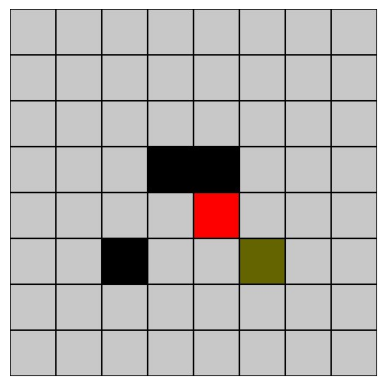

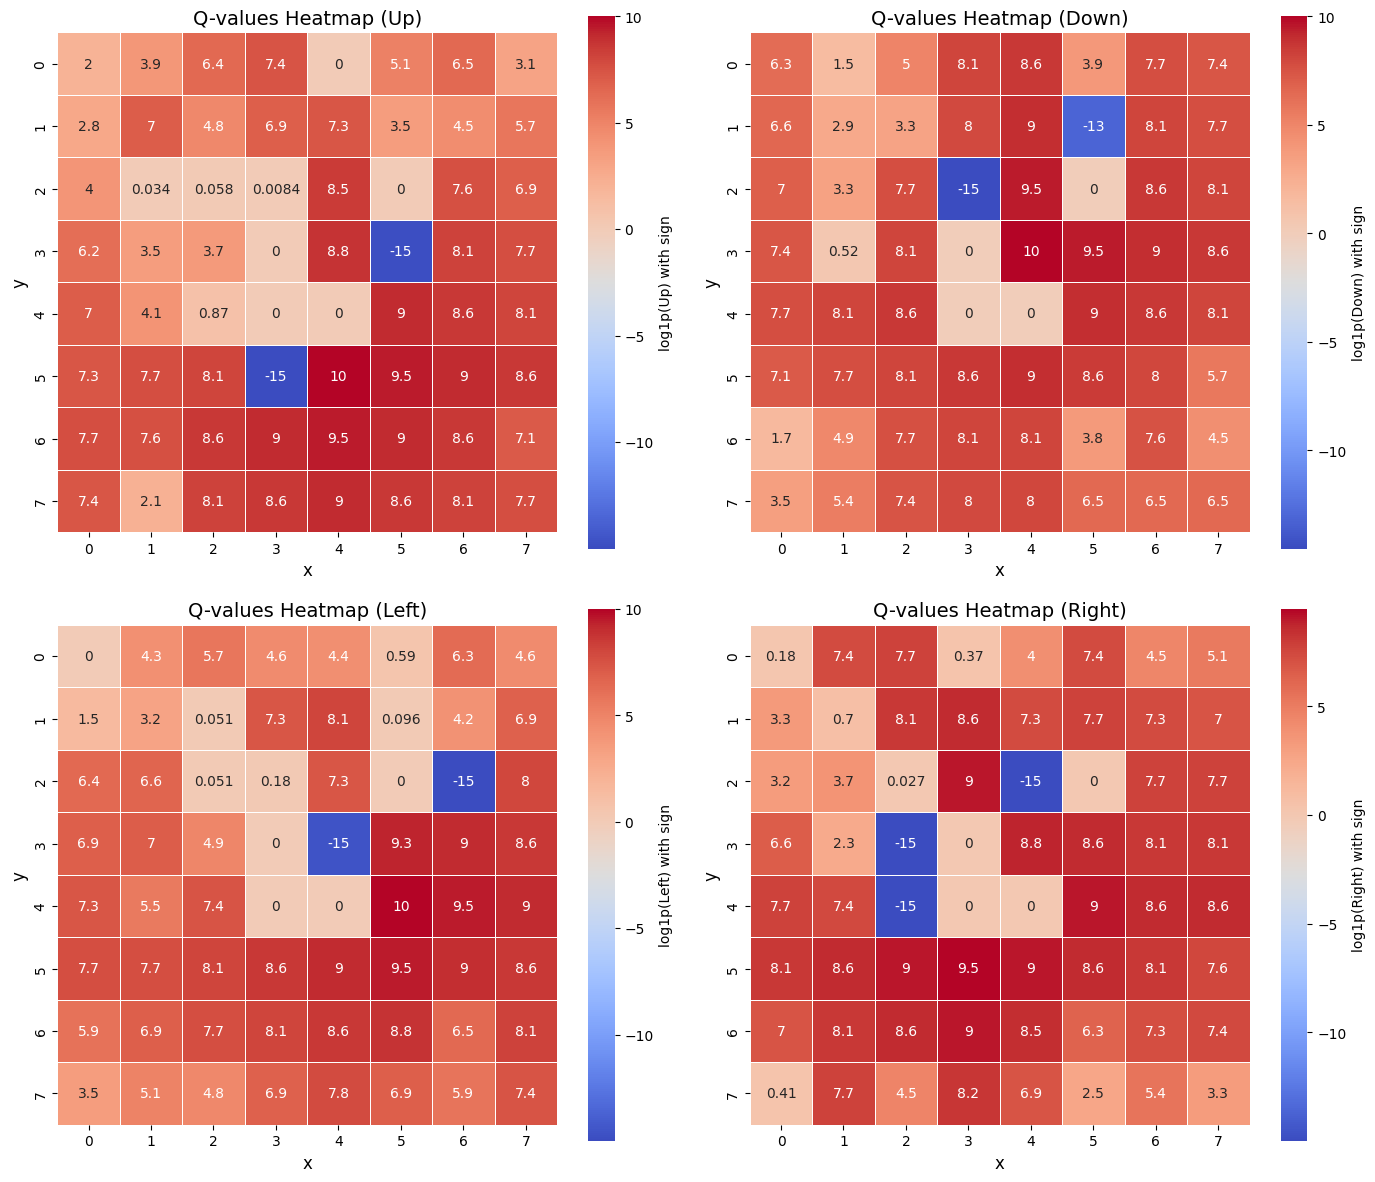

In [204]:

# Load the image using PIL
img = Image.open('img.jpg')

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()

p_columns = ['p1', 'p2', 'p3', 'p4']
p_columnsx = ['Up', 'Down', 'Left', 'Right']
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for idx, p_col in enumerate(p_columns):
    ptt = q_table_df[["x", "y", p_col]].copy()

    # Apply signed log1p transformation
    # ptt[p_col] = np.sign(ptt[p_col]) * np.log1p(np.abs(ptt[p_col]))

    # Get sorted unique x and y values
    x_unique = np.sort(ptt['x'].unique())
    y_unique = np.sort(ptt['y'].unique())

    # Create meshgrid
    grid_x, grid_y = np.meshgrid(x_unique, y_unique)
    grid_p = np.full_like(grid_x, fill_value=np.nan, dtype=float)

    # Fill grid_p with values based on (x, y)
    for i in range(len(ptt)):
        x_idx = np.where(x_unique == ptt['x'].iloc[i])[0][0]
        y_idx = np.where(y_unique == ptt['y'].iloc[i])[0][0]
        grid_p[y_idx, x_idx] = ptt[p_col].iloc[i]

    # Determine subplot position
    row = idx // 2
    col = idx % 2

    # Plot heatmap
    ax = axes[row, col]
    sns.heatmap(grid_p, 
                xticklabels=x_unique, 
                yticklabels=y_unique, 
                cmap='coolwarm', 
                cbar_kws={'label': f'log1p({p_columnsx[idx]}) with sign'}, 
                annot=True,
                linewidths=0.5,
                square=True,
                ax=ax)

    ax.set_title(f"Q-values Heatmap ({p_columnsx[idx]})", fontsize=14)
    ax.set_xlabel("x", fontsize=12)
    ax.set_ylabel("y", fontsize=12)

plt.tight_layout()
plt.show()


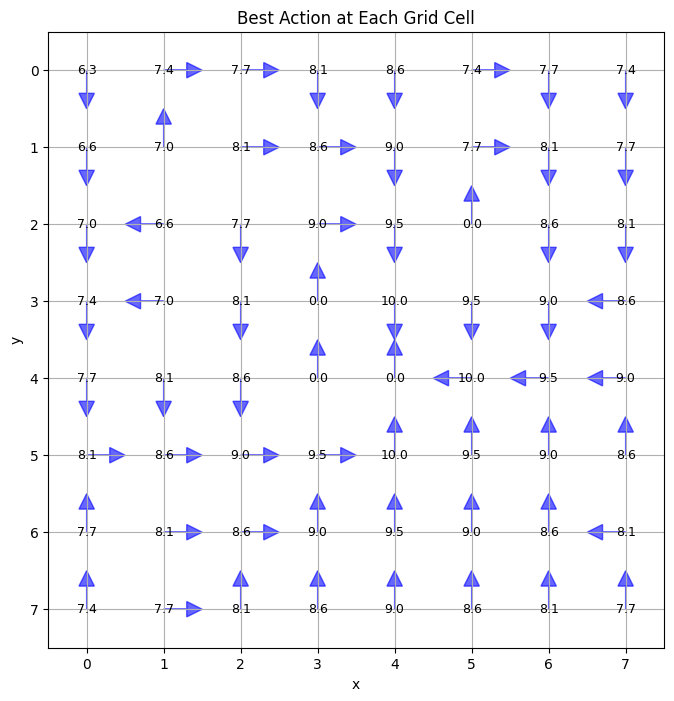

In [205]:
action_arrows = {
    0: (0, -1),   # up
    1: (0, 1),    # down
    2: (-1, 0),   # left
    3: (1, 0),    # right
}

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-0.5, q_table_df['x'].max() + 0.5)
ax.set_ylim(-0.5, q_table_df['y'].max() + 0.5)
ax.invert_yaxis()
# ax.invert_xaxis()
ax.set_aspect('equal')
ax.grid(True)

for _, row in q_table_df.iterrows():
    x, y = row['x'], row['y']
    q_values = np.array([row['p1'], row['p2'], row['p3'], row['p4']])
    best_action = np.argmax(q_values)
    dx, dy = action_arrows[best_action]
    magnitude = np.abs(q_values[best_action])

    # Draw arrow
    ax.arrow(x, y, dx * 0.3, dy * 0.3, head_width=0.2, head_length=0.2, fc='blue', ec='blue', alpha=0.6)

    # Optional: draw value as text
    ax.text(x, y, f"{q_values[best_action]:.1f}", ha='center', va='center', fontsize=9, color='black')

plt.title("Best Action at Each Grid Cell")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


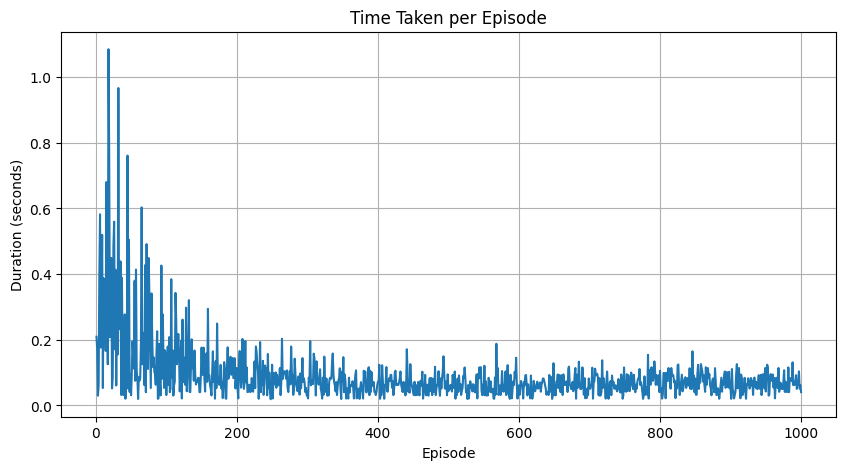

In [206]:
plt.figure(figsize=(10, 5))
plt.plot(episode_times_df["episode"], episode_times_df["duration_seconds"])
plt.xlabel("Episode")
plt.ylabel("Duration (seconds)")
plt.title("Time Taken per Episode")
plt.grid(True)
plt.show()


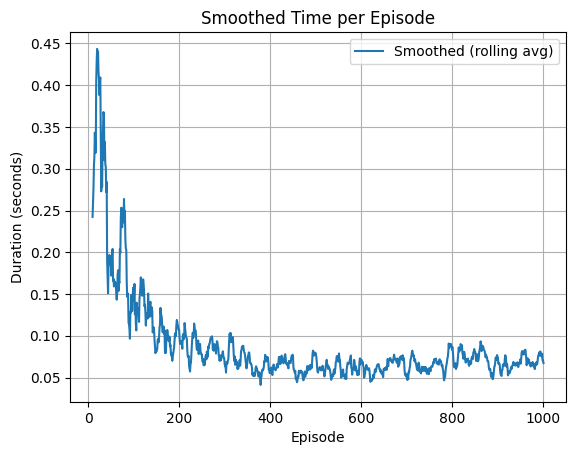

In [207]:
episode_times_df["smooth"] = episode_times_df["duration_seconds"].rolling(window=10).mean()

plt.plot(episode_times_df["episode"], episode_times_df["smooth"], label="Smoothed (rolling avg)")
plt.xlabel("Episode")
plt.ylabel("Duration (seconds)")
plt.title("Smoothed Time per Episode")
plt.legend()
plt.grid(True)
plt.show()
